In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import csv
from scipy import signal

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

save_to = "C:\\Users\\Mohini chowdary\\Desktop\\shashank\Arthur_Wegel\\BEUMER-Becherwerk-20220408T120943Z-001\\BEUMER-Becherwerk\\BEUMER Kedro\\data\\04_feature\\"

folder = "C:\\Users\\Mohini chowdary\\Desktop\\shashank\Arthur_Wegel\\BEUMER-Becherwerk-20220408T120943Z-001\\BEUMER-Becherwerk\\BEUMER Kedro\\data\\03_primary\\"


In [2]:
def getdf(folder, file):
    data = pd.read_csv(str(folder + file), sep=',')
    return data

In [3]:
file_neu_SeiteA = "neu_SeiteA.csv"
file_neu_SeiteB = "neu_SeiteB.csv"
file_alt = "alt.csv"

file_neu1000_SeiteA = "neu1000_SeiteA.csv"
file_neu1000_SeiteB = "neu1000_SeiteB.csv"
file_alt1000 = "alt1000.csv"

file_neu2000 = "neu2000.csv"
file_alt2000 = "alt2000.csv"

#df_neu_SeiteA = getdf(folder, file_neu_SeiteA)
#df_neu_SeiteB = getdf(folder, file_neu_SeiteB)
#df_alt = getdf(folder, file_alt)

df_neu1000_SeiteA = getdf(folder, file_neu1000_SeiteA)
df_neu1000_SeiteB = getdf(folder, file_neu1000_SeiteB)
df_alt1000 = getdf(folder, file_alt1000)

df_neu2000 = getdf(folder, file_neu2000)
df_alt2000 = getdf(folder, file_alt2000)

#df_neu_SeiteA.drop(columns=['Unnamed: 0'],inplace=True)
#df_neu_t_SeiteA = df_neu_SeiteA.T
#df_neu_t_SeiteA.drop(labels = df_neu_t_SeiteA.columns.values[-1], axis=1)

#df_neu_SeiteB.drop(columns=['Unnamed: 0'],inplace=True)
#df_neu_t_SeiteB = df_neu_SeiteB.T
#df_neu_t_SeiteB.drop(labels = df_neu_t_SeiteB.columns.values[-1], axis=1)

#df_alt.drop(columns=['Unnamed: 0'],inplace=True)
#df_alt_t = df_alt.T
#df_alt_t.drop(labels = df_alt_t.columns.values[-1], axis=1)

df_neu1000_SeiteA.drop(columns=['Unnamed: 0'],inplace=True)
df_neu1000_t_SeiteA = df_neu1000_SeiteA.T
df_neu1000_t_SeiteA.drop(labels = df_neu1000_t_SeiteA.columns.values[-1], axis=1)

df_neu1000_SeiteB.drop(columns=['Unnamed: 0'],inplace=True)
df_neu1000_t_SeiteB = df_neu1000_SeiteB.T
df_neu1000_t_SeiteB.drop(labels = df_neu1000_t_SeiteB.columns.values[-1], axis=1)

df_alt1000.drop(columns=['Unnamed: 0'],inplace=True)
df_alt1000_t = df_alt1000.T
df_alt1000_t.drop(labels = df_alt1000_t.columns.values[-1], axis=1)

df_neu2000.drop(columns=['Unnamed: 0'],inplace=True)
df_neu2000_t = df_neu2000.T
df_neu2000_t.drop(labels = df_neu2000_t.columns.values[-1], axis=1)

df_alt2000.drop(columns=['Unnamed: 0'],inplace=True)
df_alt2000_t = df_alt2000.T
df_alt2000_t.drop(labels = df_alt2000_t.columns.values[-1], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812
20.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37.19298245614035,263.910970,263.167247,261.457454,261.938924,263.638009,262.937255,264.609146,262.194584,263.910970,264.609146,...,264.123077,261.963738,264.372843,262.667090,263.167247,263.400835,262.185049,263.638009,264.140114,261.963738
54.3859649122807,1854.159648,1851.409463,1839.187049,1843.687609,1856.803705,1852.751737,1855.064689,1845.917929,1852.058584,1858.537059,...,1854.389387,1844.876690,1849.655373,1848.241597,1841.827896,1845.401853,1840.782442,1848.867762,1857.435059,1845.983749
71.57894736842104,4427.366712,4418.470889,4387.633645,4404.971056,4430.378991,4429.027546,4422.612802,4403.774404,4420.444548,4432.961087,...,4426.341605,4403.374161,4411.499178,4413.793153,4385.587760,4401.259138,4390.695275,4407.127409,4439.434423,4407.372914
88.7719298245614,4879.250865,4871.313273,4823.911483,4861.608993,4878.584323,4879.740362,4862.944067,4838.572620,4871.453582,4877.825848,...,4876.044401,4845.888979,4858.449238,4862.717964,4816.323286,4841.622146,4830.478651,4849.936598,4898.375343,4849.447907
105.96491228070175,2704.169373,2710.952600,2661.774032,2699.693501,2693.407136,2692.842550,2681.701326,2665.120635,2704.779843,2696.190832,...,2700.327573,2675.100372,2695.722909,2683.008945,2655.602568,2667.747552,2672.157368,2674.421994,2718.266543,2674.460132
123.1578947368421,828.507695,840.277335,808.082298,817.195815,800.201225,808.616720,798.022556,802.421336,832.864935,826.813764,...,815.138025,819.771310,836.643891,798.010025,818.164409,792.800101,822.329618,793.614516,828.613903,803.614335
140.35087719298244,195.576072,195.358645,187.480666,179.799889,163.232962,185.539753,171.816763,163.413586,194.180329,196.290601,...,193.865933,211.966979,213.637544,170.205758,216.171228,175.045708,211.558503,168.404275,193.258894,188.488726
157.5438596491228,47.853944,31.384710,52.630789,41.000000,34.885527,46.690470,39.849718,23.021729,55.172457,26.248809,...,72.124892,58.549125,68.007353,46.861498,62.649820,42.047592,67.186308,47.381431,55.009090,49.648766
174.73684210526315,23.345235,9.433981,47.801674,13.038405,23.323808,35.383612,15.231546,13.601471,36.055513,23.769729,...,50.219518,32.202484,41.231056,30.083218,38.639358,25.495098,31.064449,30.805844,43.011626,21.189620


In [4]:
test_file_neu_SeiteA = "test_neu_SeiteA.csv"
test_file_neu_SeiteB = "test_neu_SeiteB.csv"
test_file_alt = "test_alt.csv"

test_file_neu1000_SeiteA = "test_neu1000_SeiteA.csv"
test_file_neu1000_SeiteB = "test_neu1000_SeiteB.csv"
test_file_alt1000 = "test_alt1000.csv"

test_file_neu2000 = "test_neu2000.csv"
test_file_alt2000 = "test_alt2000.csv"

df_test_neu1000_SeiteA = getdf(folder, test_file_neu1000_SeiteA)
df_test_neu1000_SeiteB = getdf(folder, test_file_neu1000_SeiteB)
df_test_alt1000 = getdf(folder, test_file_alt1000)

df_test_neu2000 = getdf(folder, test_file_neu2000)
df_test_alt2000 = getdf(folder, test_file_alt2000)

df_test_neu1000_SeiteA.drop(columns=['Unnamed: 0'],inplace=True)
df_test_neu1000_t_SeiteA = df_test_neu1000_SeiteA.T
df_test_neu1000_t_SeiteA.drop(labels = df_test_neu1000_t_SeiteA.columns.values[-1], axis=1)

df_test_neu1000_SeiteB.drop(columns=['Unnamed: 0'],inplace=True)
df_test_neu1000_t_SeiteB = df_test_neu1000_SeiteB.T
df_test_neu1000_t_SeiteB.drop(labels = df_test_neu1000_t_SeiteB.columns.values[-1], axis=1)

df_test_alt1000.drop(columns=['Unnamed: 0'],inplace=True)
df_test_alt1000_t = df_test_alt1000.T
df_test_alt1000_t.drop(labels = df_test_alt1000_t.columns.values[-1], axis=1)

df_test_neu2000.drop(columns=['Unnamed: 0'],inplace=True)
df_test_neu2000_t = df_test_neu2000.T
df_test_neu2000_t.drop(labels = df_test_neu2000_t.columns.values[-1], axis=1)

df_test_alt2000.drop(columns=['Unnamed: 0'],inplace=True)
df_test_alt2000_t = df_test_alt2000.T
df_test_alt2000_t.drop(labels = df_test_alt2000_t.columns.values[-1], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,699,700,701,702,703,704,705,706,707,708
20.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37.19298245614035,262.688028,263.655078,263.205243,261.467015,260.754674,263.655078,261.721226,261.467015,263.469163,262.240348,...,261.721226,263.321097,265.135814,260.754674,263.655078,261.721226,261.979007,261.013410,262.773667,261.467015
54.3859649122807,1844.025217,1851.816946,1842.448914,1839.619526,1830.567672,1845.736980,1840.198359,1836.283203,1841.459476,1841.873503,...,1837.809838,1836.563367,1856.302238,1832.686825,1847.543234,1838.217071,1840.036141,1835.792200,1839.819828,1837.809838
71.57894736842104,4394.109694,4410.797887,4393.289656,4385.982444,4361.406310,4393.647801,4393.241400,4380.658626,4389.770040,4389.026771,...,4386.572466,4368.743641,4420.831822,4367.581596,4401.277655,4385.118128,4392.739464,4385.571913,4387.186000,4381.781373
88.7719298245614,4830.122980,4844.469218,4832.829399,4826.619521,4793.867124,4827.124403,4833.688136,4821.834609,4829.745853,4826.275168,...,4827.059664,4802.821879,4852.365712,4792.434141,4837.968685,4825.447544,4835.181279,4831.741405,4824.663408,4812.710255
105.96491228070175,2652.063725,2664.258246,2659.769915,2681.368307,2645.152737,2662.188949,2657.127208,2669.334374,2665.817886,2663.971471,...,2664.124997,2662.872321,2662.397791,2627.446669,2675.538264,2664.000751,2665.792565,2672.423993,2656.001694,2643.229086
123.1578947368421,771.002594,799.142666,789.801241,841.052317,803.086546,798.984981,783.970663,824.942422,795.015723,808.954881,...,800.870152,828.401473,780.932776,793.333473,822.601362,815.794705,797.579463,814.485113,788.964511,787.022871
140.35087719298244,163.193137,177.792013,178.488095,201.357890,176.977400,180.360750,178.885438,205.243758,164.210231,203.806281,...,175.114248,198.736006,155.939091,210.297408,202.408004,199.150697,171.233758,192.169196,192.052076,174.106289
157.5438596491228,43.104524,38.948684,38.052595,41.976184,20.880613,47.434165,51.623638,48.093659,31.064449,66.483081,...,35.355339,43.965896,25.019992,84.172442,41.436699,44.654227,23.853721,40.706265,67.416615,28.301943
174.73684210526315,18.867962,33.421550,15.652476,26.570661,11.661904,22.847319,25.298221,20.099751,22.090722,30.870698,...,7.211103,29.068884,37.107951,35.777088,17.888544,33.541020,34.234486,12.041595,19.104973,31.400637


In [5]:
# The columns '449.8245614035087','363.859649122807','518.5964912280701','724.9122807017543', can also be retained
columns_to_drop = ['243.50877192982455','449.8245614035087','467.0175438596491','484.2105263157894','501.40350877192975','518.5964912280701','535.7894736842105','552.9824561403508','673.3333333333333','914.0350877192982','724.9122807017543','20.0','37.19298245614035','54.3859649122807','71.57894736842104','88.7719298245614','105.96491228070175','123.1578947368421','140.35087719298244','157.5438596491228','174.73684210526315','191.9298245614035','209.12280701754383','226.3157894736842','570.1754385964912','587.3684210526316','604.5614035087718','621.7543859649122','638.9473684210526','656.1403508771929','690.5263157894736','707.719298245614','742.1052631578947','759.2982456140351','776.4912280701753','793.6842105263157','810.8771929824561','828.0701754385964','845.2631578947368','862.4561403508771','879.6491228070174','896.8421052631578','931.2280701754385','948.4210526315788','965.6140350877192','982.8070175438595','1000.0']
#columns_to_keep = ['260.7017543859649','398.24561403508767','415.43859649122805','673.3333333333333','914.0350877192982','724.9122807017543']
#df_neu_SeiteA.drop(columns = columns_to_drop, inplace=True)
#df_neu_SeiteB.drop(columns = columns_to_drop, inplace=True)
#df_alt.drop(columns = columns_to_drop, inplace=True)
df_neu1000_SeiteA.drop(columns = columns_to_drop, inplace=True)
df_neu1000_SeiteB.drop(columns = columns_to_drop, inplace=True)
df_alt1000.drop(columns = columns_to_drop, inplace=True)
df_neu2000.drop(columns = columns_to_drop, inplace=True)
df_alt2000.drop(columns = columns_to_drop, inplace=True)

In [6]:
#df_neu = df_neu.diff(axis=1)
#df_alt = df_alt.diff(axis=1)
#df_neu1000 = df_neu1000.diff(axis=1)
#df_alt1000 = df_alt1000.diff(axis=1)
#df_neu2000 = df_neu2000.diff(axis=1)
#df_alt2000 = df_alt2000.diff(axis=1)
#df_alt2000

In [7]:
#df_neu = df_neu.sample(n=len(df_alt), random_state=1)
#df_neu1000 = df_neu1000.sample(n=len(df_alt1000), random_state=1)
#print("df_neu_SeiteA",len(df_neu_SeiteA))
#print("df_neu_SeiteB",len(df_neu_SeiteB))
#print("df_alt",len(df_alt))
print("df_neu1000_SeiteA",len(df_neu1000_SeiteA))
print("df_neu1000_SeiteB",len(df_neu1000_SeiteB))
print("df_alt1000",len(df_alt1000))
print("df_neu2000",len(df_neu2000))
print("df_alt2000",len(df_alt2000))
#df = pd.concat([survived,deceased],axis=0)

df_neu1000_SeiteA 2139
df_neu1000_SeiteB 1948
df_alt1000 1822
df_neu2000 1812
df_alt2000 1814


In [8]:
df_neu1000_SeiteA['Label'] = 'neu'
df_neu1000_SeiteB['Label'] = 'neu'
df_alt1000['Label'] = 'alt'
frames1000_SeiteA = [df_neu1000_SeiteA, df_alt1000]
frames1000_SeiteB = [df_neu1000_SeiteB, df_alt1000]
result1000_SeiteA = pd.concat(frames1000_SeiteA)
result1000_SeiteB = pd.concat(frames1000_SeiteB)

df_neu2000['Label'] = 'neu'
df_alt2000['Label'] = 'alt'
frames2000 = [df_neu2000, df_alt2000]
result2000 = pd.concat(frames2000)

#df_neu_SeiteA['Label'] = 'neu'
#df_neu_SeiteB['Label'] = 'neu'
#df_alt['Label'] = 'alt'
frames_SeiteA = [df_neu1000_SeiteA, df_alt1000, df_neu2000, df_alt2000]
frames_SeiteB = [df_neu1000_SeiteB, df_alt1000, df_neu2000, df_alt2000]
result_SeiteA = pd.concat(frames_SeiteA)
result_SeiteB = pd.concat(frames_SeiteB)

# 19 features
result_SeiteA

,260.7017543859649,277.89473684210526,295.0877192982456,312.2807017543859,329.4736842105263,346.66666666666663,363.859649122807,381.05263157894734,398.24561403508767,415.43859649122805,432.6315789473684,Label
0,19935.402002,34830.272250,26201.336703,14405.467885,27788.156074,17588.043950,8271.634482,29636.032798,22253.928912,25269.529893,19109.517001,neu
1,19802.404122,44283.104521,22484.508645,24032.430797,18830.503366,11880.745978,22382.353071,29671.580915,22132.082979,25359.284079,19014.592949,neu
2,20109.974938,39135.089242,23460.733002,16053.084065,29327.569777,10060.300791,13813.590192,29800.242835,22410.204104,25384.567950,19043.655453,neu
3,20171.423202,37444.243269,24161.930324,14010.919313,29172.266316,16616.409059,8990.194214,29480.283920,22311.232530,25392.180076,19133.010976,neu
4,19962.151612,39443.242564,23467.798278,19449.071160,20731.718356,11006.677110,21725.256316,30208.292587,22555.043471,25591.361765,19166.970992,neu
...,...,...,...,...,...,...,...,...,...,...,...,...
1809,14420.100312,37177.276460,28792.907807,23002.469454,33671.152713,32476.675969,6268.645547,9460.139217,20201.975473,29559.582270,29161.351906,alt
1810,14273.135675,41492.989890,24560.344664,15964.753302,30305.275118,32483.521268,6752.823484,9279.042246,19859.137167,29236.128642,28989.172323,alt
1811,14407.121329,37773.834608,28360.022743,22807.671385,33670.035016,32552.959435,6604.811882,9673.600622,20216.725798,29426.121321,28985.367791,alt
1812,14605.941976,37074.357958,28583.526479,22890.639943,33632.791677,32496.599822,6594.869294,9573.124986,20121.995453,29431.923519,29087.789689,alt


In [9]:
res_SeiteA = result_SeiteA.to_csv(save_to + "result_SeiteA.csv")
res_SeiteB = result_SeiteB.to_csv(save_to + "result_SeiteB.csv")
res1_SeiteA = result1000_SeiteA.to_csv(save_to + "result1000_SeiteA.csv")
res1_SeiteB = result1000_SeiteB.to_csv(save_to + "result1000_SeiteB.csv")
res2 = result2000.to_csv(save_to + "result2000.csv")

In [10]:
font = {'family': 'arial', 'color': 'black', 'weight': 'normal', 'size': 70}

blau = (51/256,145/256,202/256)
rot = (219/256, 72/256, 72/256)
gruen = (120/256, 180/256, 88/256)
orange = (246/256, 174/256, 60/256)

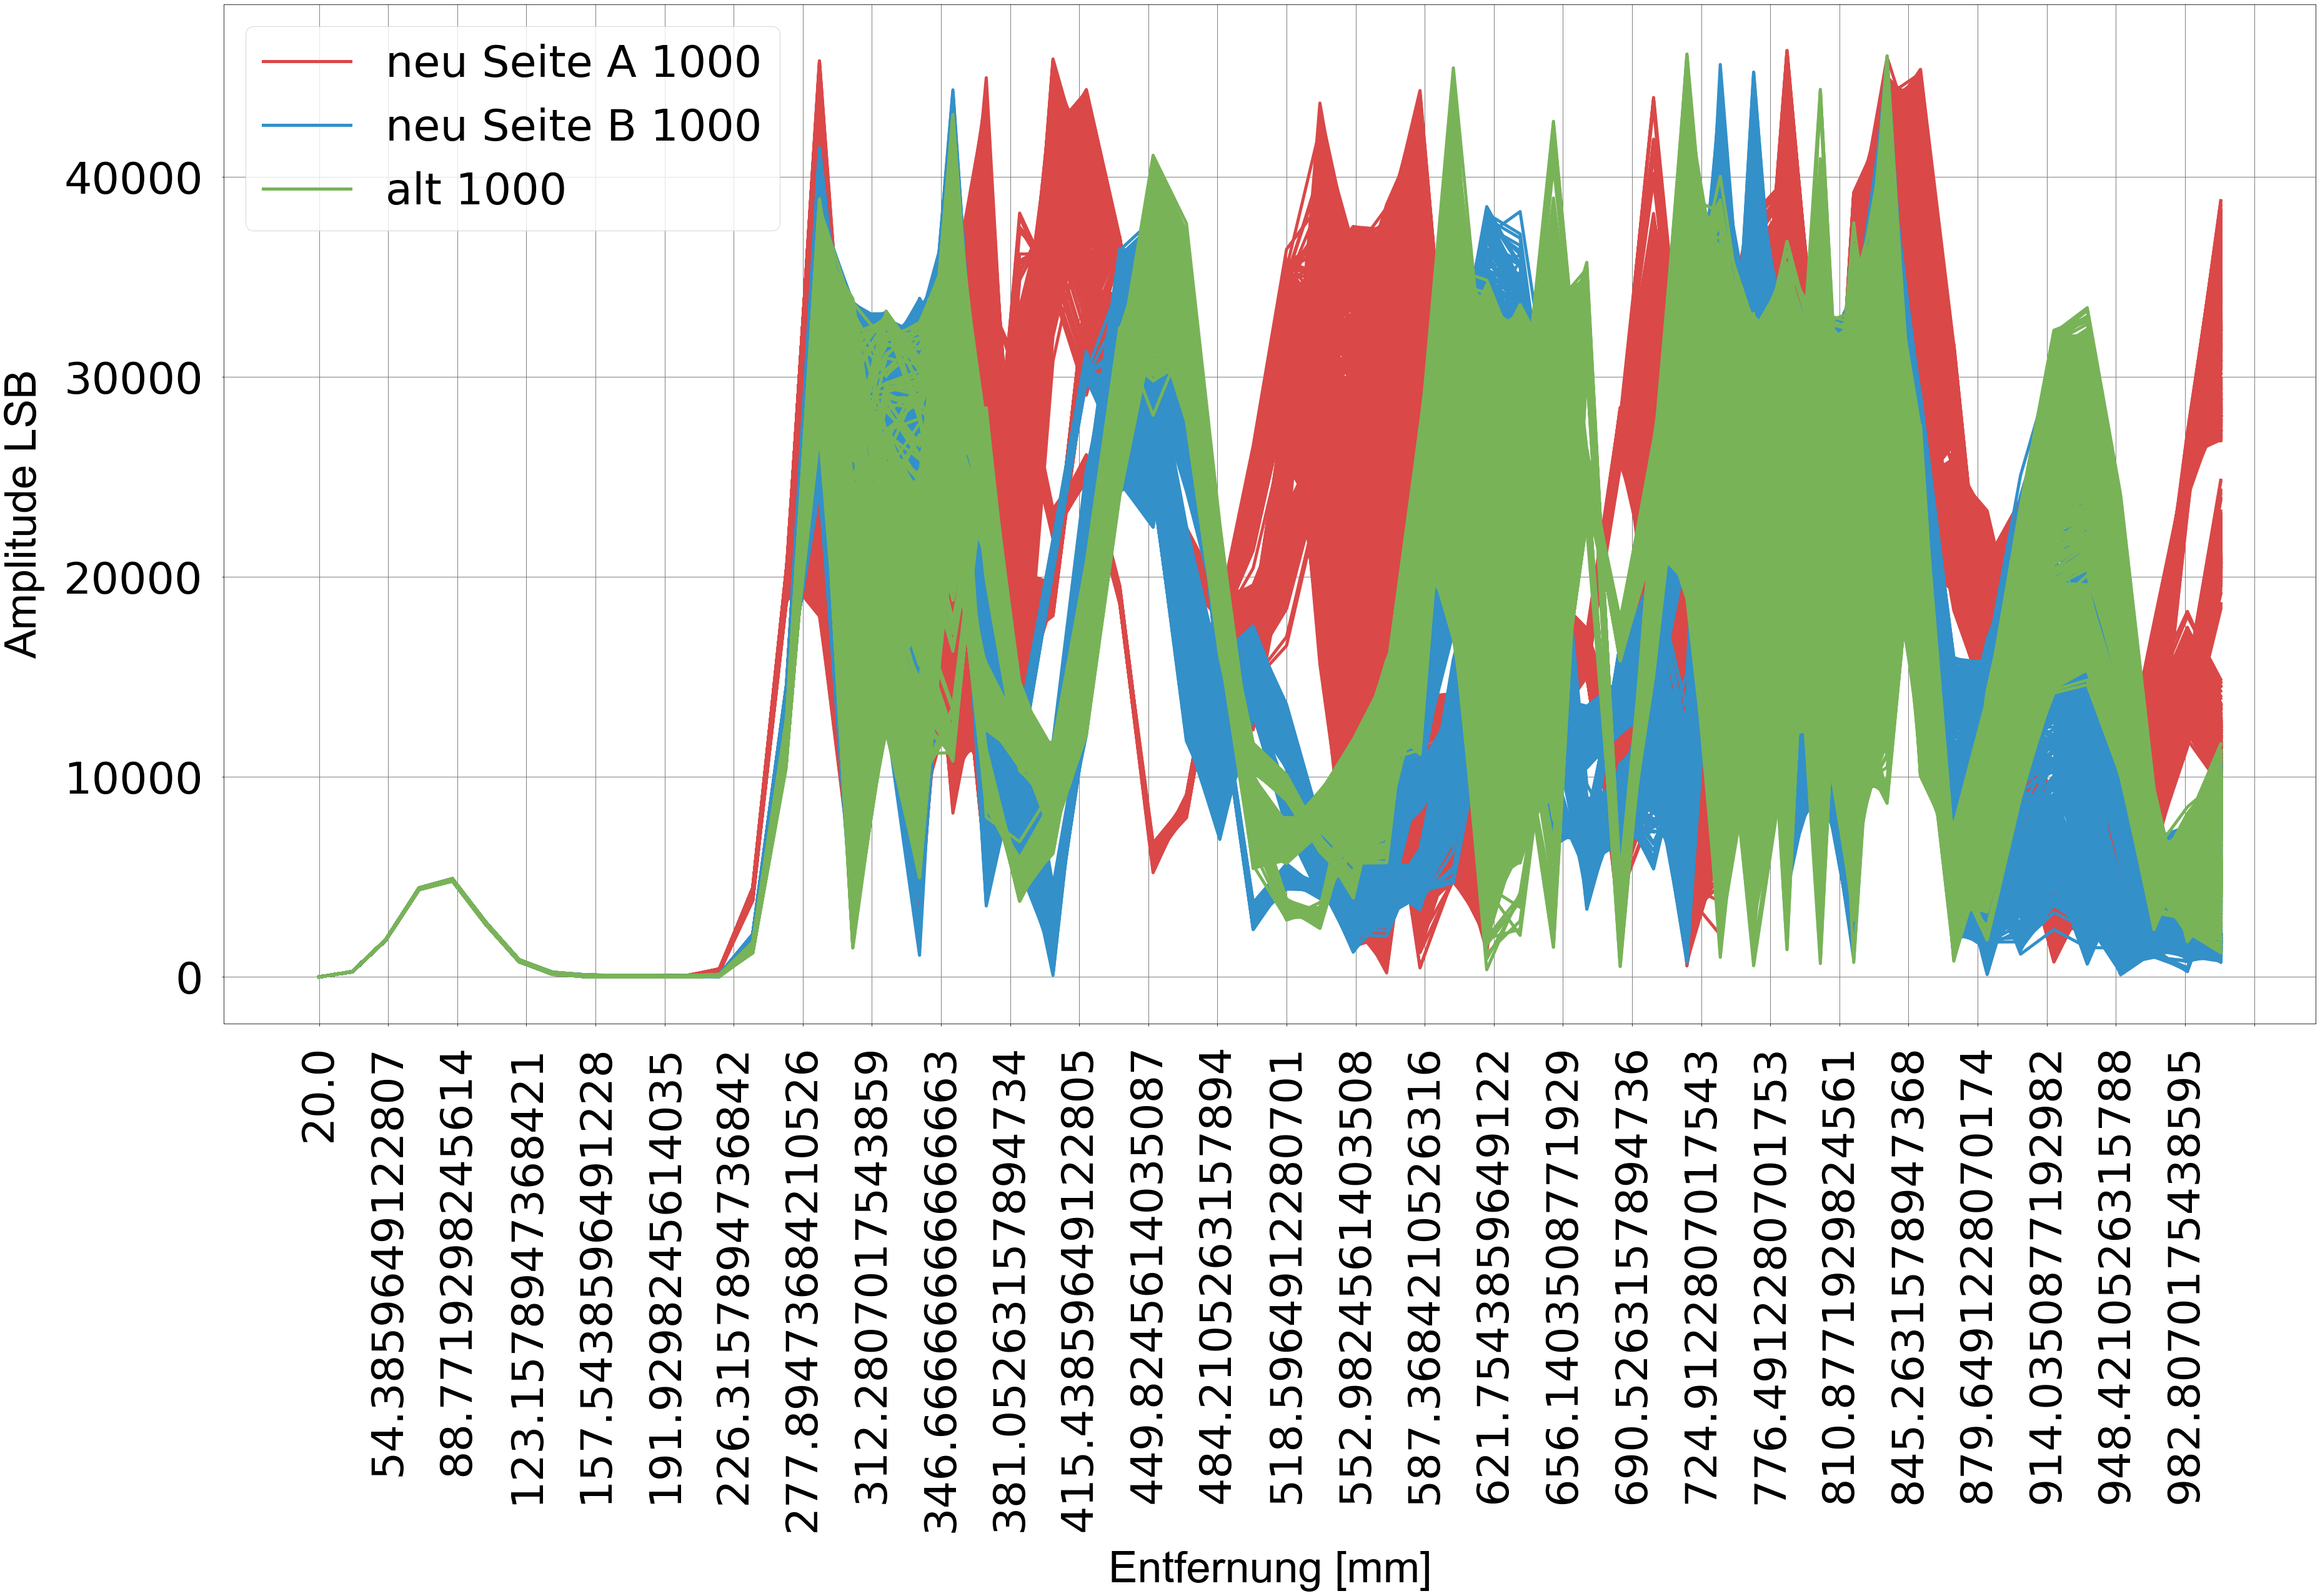

In [11]:
nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)

for j in range(len(df_neu1000_t_SeiteA.columns.values)):
    axs.plot(df_neu1000_t_SeiteA.index.values, df_neu1000_t_SeiteA[j], linewidth=5, color=rot)
axs.plot(df_neu1000_t_SeiteA.index.values, df_neu1000_t_SeiteA[j], linewidth=5, color=rot, label="neu Seite A 1000")
for i in range(len(df_neu1000_t_SeiteB.columns.values)):
    axs.plot(df_neu1000_t_SeiteB.index.values, df_neu1000_t_SeiteB[i], linewidth=5, color=blau)
axs.plot(df_neu1000_t_SeiteB.index.values, df_neu1000_t_SeiteB[i], linewidth=5, color=blau, label="neu Seite B 1000")
for i in range(len(df_alt1000_t.columns.values)):
    axs.plot(df_alt1000_t.index.values, df_alt1000_t[i], linewidth=5, color=gruen)
axs.plot(df_alt1000_t.index.values, df_alt1000_t[i], linewidth=5, color=gruen, label="alt 1000")

axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(0,58,29))#

axs.grid(True, axis='both', linewidth=1, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles,lables, fontsize=70, loc="best")
plt.show()

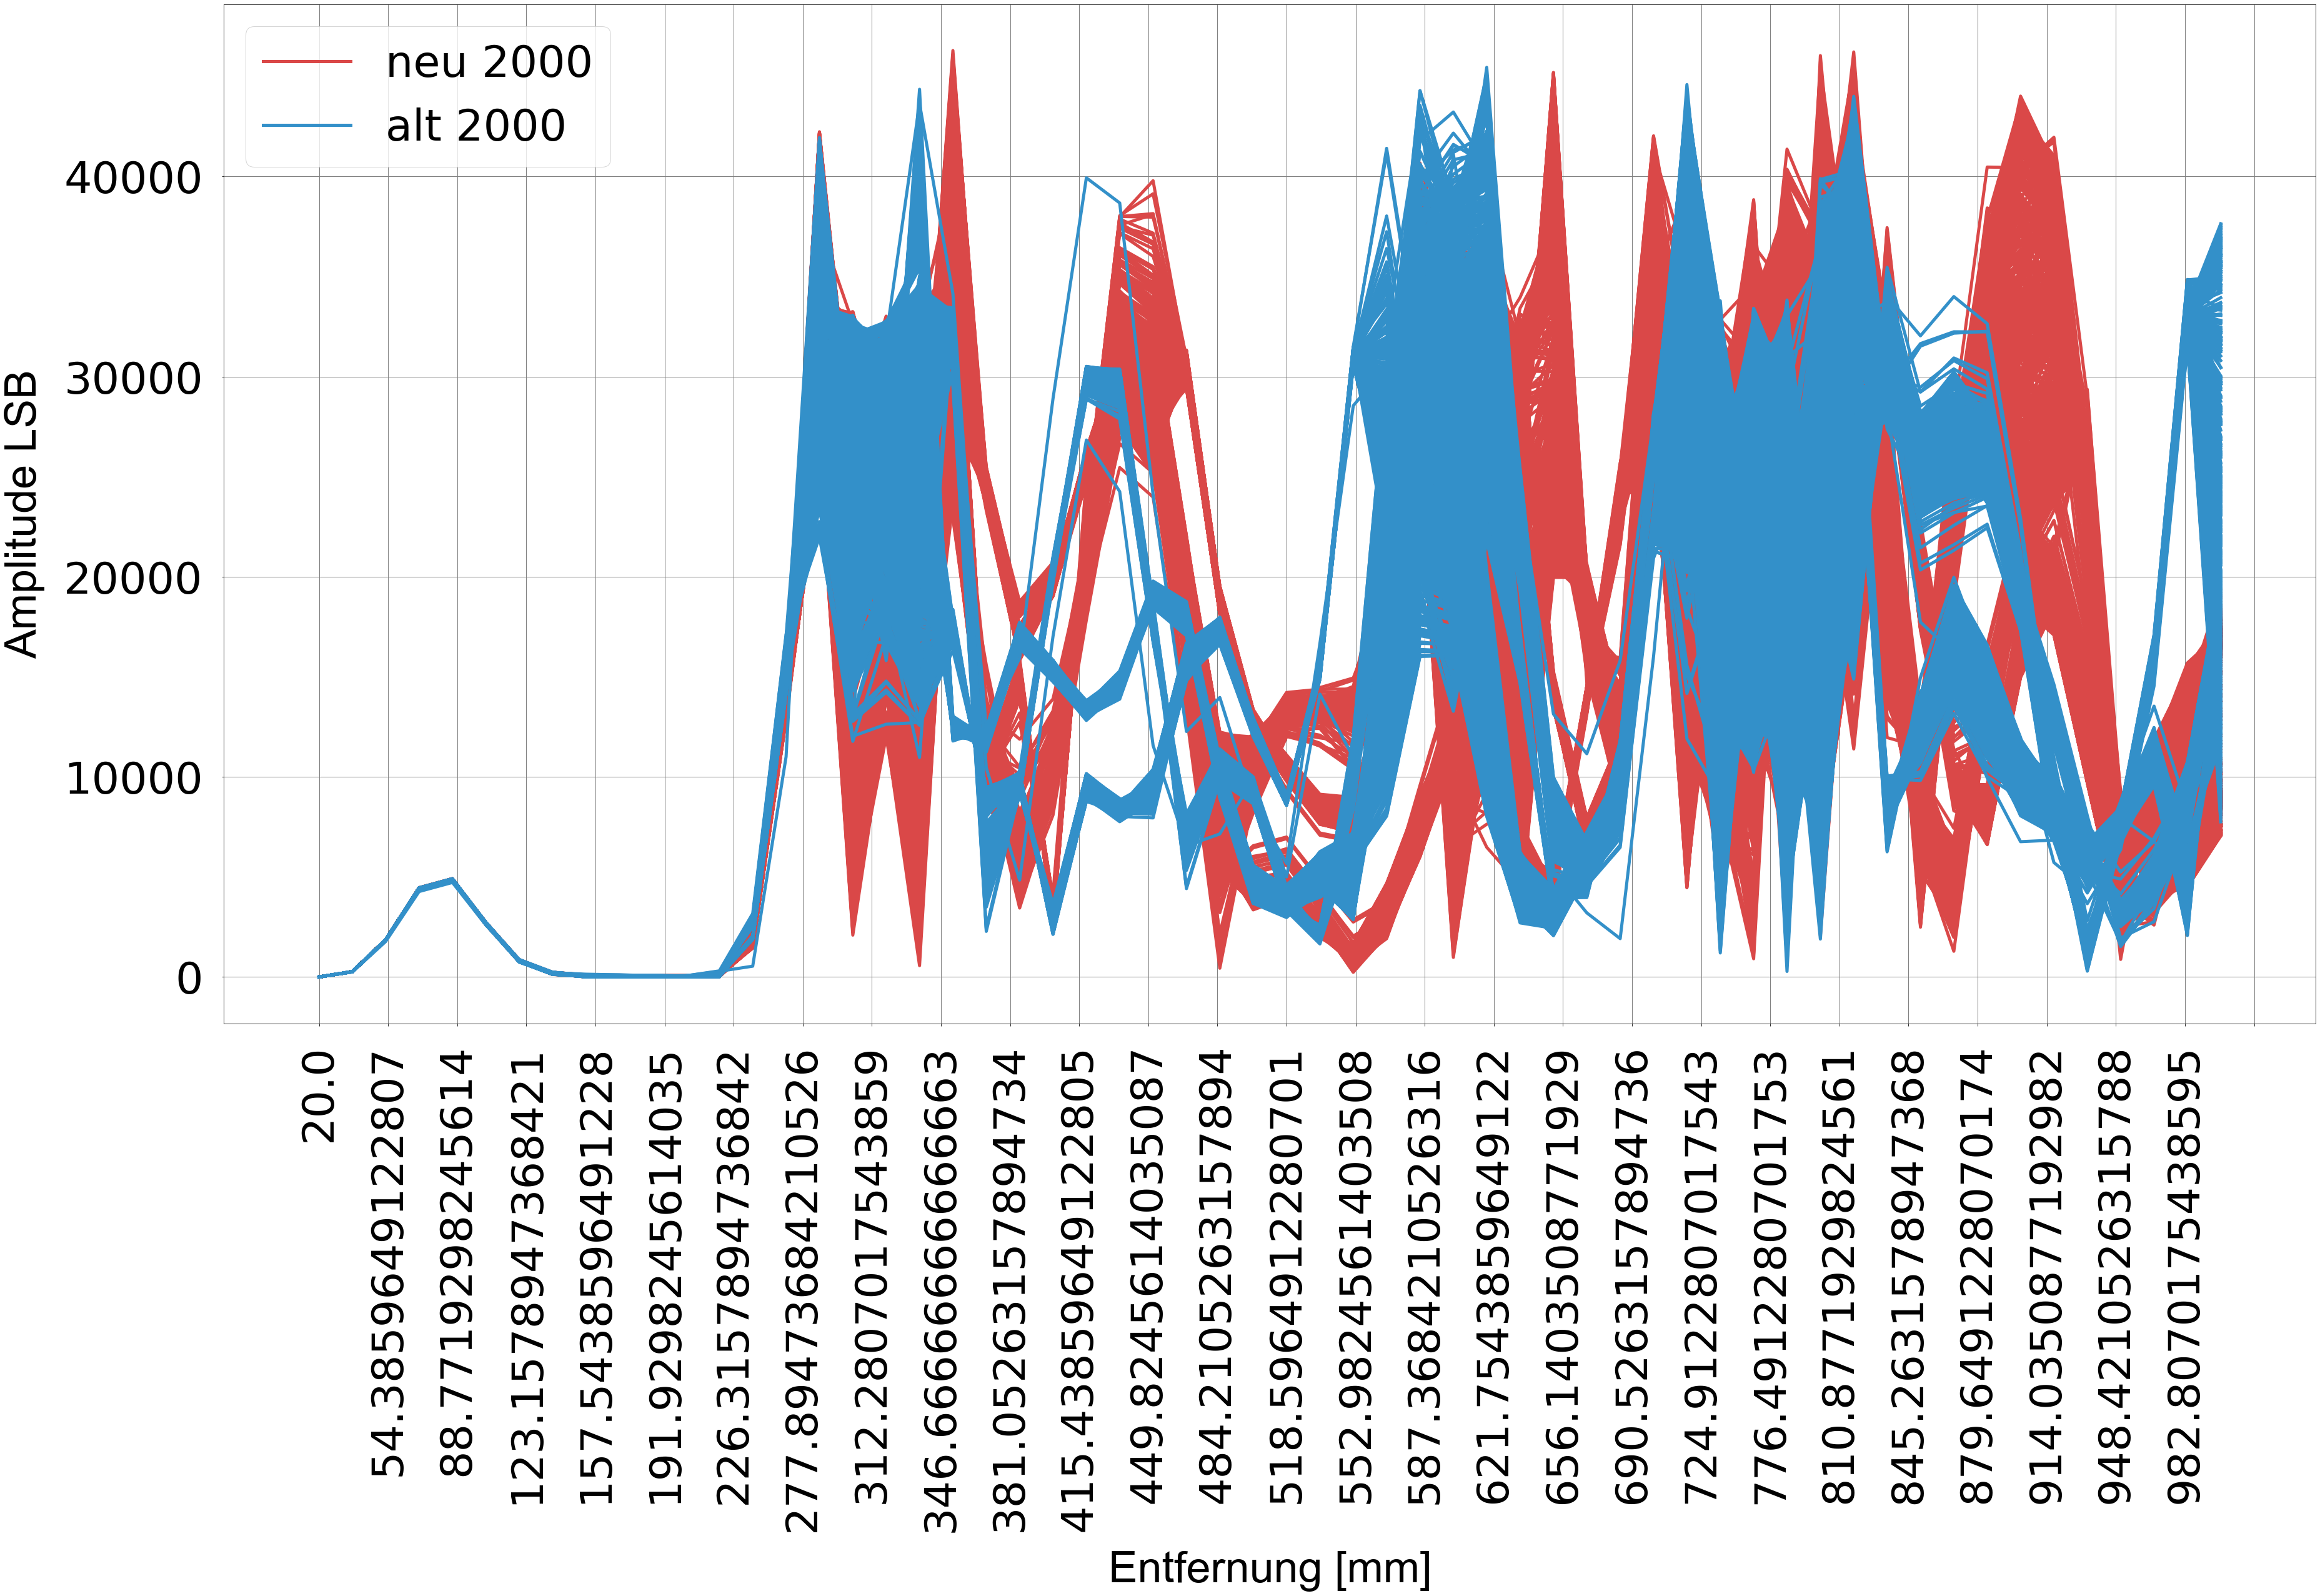

In [12]:
nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)

for j in range(len(df_neu2000_t.columns.values)):
    axs.plot(df_neu2000_t.index.values, df_neu2000_t[j], linewidth=5, color=rot)
axs.plot(df_neu2000_t.index.values, df_neu2000_t[j], linewidth=5, color=rot, label="neu 2000")
for i in range(len(df_alt2000_t.columns.values)):
    axs.plot(df_alt2000_t.index.values, df_alt2000_t[i], linewidth=5, color=blau)
axs.plot(df_alt2000_t.index.values, df_alt2000_t[i], linewidth=5, color=blau, label="alt 2000")

axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(0,58,29))#

axs.grid(True, axis='both', linewidth=1, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles,lables, fontsize=70, loc="best")
plt.show()

In [ ]:
nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)

for j in range(len(df_neu1000_t_SeiteA.columns.values)):
    axs.plot(df_neu1000_t_SeiteA.index.values, df_neu1000_t_SeiteA[j], linewidth=5, color=rot)
axs.plot(df_neu1000_t_SeiteA.index.values, df_neu1000_t_SeiteA[j], linewidth=5, color=rot, label="neu Seite A 1000")
for i in range(len(df_neu1000_t_SeiteB.columns.values)):
    axs.plot(df_neu1000_t_SeiteB.index.values, df_neu1000_t_SeiteB[i], linewidth=5, color=blau)
axs.plot(df_neu1000_t_SeiteB.index.values, df_neu1000_t_SeiteB[i], linewidth=5, color=blau, label="neu Seite B 1000")
for i in range(len(df_test_neu1000_t_SeiteA.columns.values)):
    axs.plot(df_test_neu1000_t_SeiteA.index.values, df_test_neu1000_t_SeiteA[i], linewidth=5, color=gruen)
axs.plot(df_test_neu1000_t_SeiteA.index.values, df_test_neu1000_t_SeiteA[i], linewidth=5, color=gruen, label="test neu Seite A 1000")
for i in range(len(df_test_neu1000_t_SeiteB.columns.values)):
    axs.plot(df_test_neu1000_t_SeiteB.index.values, df_test_neu1000_t_SeiteB[i], linewidth=5, color=orange)
axs.plot(df_test_neu1000_t_SeiteB.index.values, df_test_neu1000_t_SeiteB[i], linewidth=5, color=orange, label="test neu Seite B 1000")

axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(0,58,29))#

axs.grid(True, axis='both', linewidth=1, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles,lables, fontsize=70, loc="best")
plt.show()

In [ ]:
nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)

for j in range(len(df_alt1000_t.columns.values)):
    axs.plot(df_alt1000_t.index.values, df_alt1000_t[j], linewidth=5, color=rot)
axs.plot(df_alt1000_t.index.values, df_alt1000_t[j], linewidth=5, color=rot, label="alt 1000")
for i in range(len(df_test_alt1000_t.columns.values)):
    axs.plot(df_test_alt1000_t.index.values, df_test_alt1000_t[i], linewidth=5, color=blau)
axs.plot(df_test_alt1000_t.index.values, df_test_alt1000_t[i], linewidth=5, color=blau, label="test alt 1000")

axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(0,58,29))#

axs.grid(True, axis='both', linewidth=1, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles,lables, fontsize=70, loc="best")
plt.show()

In [ ]:
nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)

for i in range(len(df_neu2000_t.columns.values)):
    axs.plot(df_neu2000_t.index.values, df_neu2000_t[i], linewidth=5, color=rot)
axs.plot(df_neu2000_t.index.values, df_neu2000_t[i], linewidth=5, color=rot, label="neu 2000")
for i in range(len(df_test_neu2000_t.columns.values)):
    axs.plot(df_test_neu2000_t.index.values, df_test_neu2000_t[i], linewidth=5, color=blau)
axs.plot(df_test_neu2000_t.index.values, df_test_neu2000_t[i], linewidth=5, color=blau, label="test neu 2000")

axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(0,58,29))#

axs.grid(True, axis='both', linewidth=1, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles,lables, fontsize=70, loc="best")
plt.show()

In [ ]:
nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)

for i in range(len(df_alt2000_t.columns.values)):
    axs.plot(df_alt2000_t.index.values, df_alt2000_t[i], linewidth=5, color=rot)
axs.plot(df_alt2000_t.index.values, df_alt2000_t[i], linewidth=5, color=blau, label="alt 2000")
for i in range(len(df_test_alt2000_t.columns.values)):
    axs.plot(df_test_alt2000_t.index.values, df_test_alt2000_t[i], linewidth=5, color=blau)
axs.plot(df_test_alt2000_t.index.values, df_test_alt2000_t[i], linewidth=5, color=blau, label="test alt 2000")

axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(0,58,29))#

axs.grid(True, axis='both', linewidth=1, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles,lables, fontsize=70, loc="best")
plt.show()

In [ ]:
nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)

for j in range(len(df_neu1000_t_SeiteA.columns.values)):
    axs.plot(df_neu1000_t_SeiteA.index.values, df_neu1000_t_SeiteA[j], linewidth=5, color=rot)
axs.plot(df_neu1000_t_SeiteA.index.values, df_neu1000_t_SeiteA[j], linewidth=5, color=rot, label="neu Seite A 1000")
for i in range(len(df_neu1000_t_SeiteB.columns.values)):
    axs.plot(df_neu1000_t_SeiteB.index.values, df_neu1000_t_SeiteB[i], linewidth=5, color=blau)
axs.plot(df_neu1000_t_SeiteB.index.values, df_neu1000_t_SeiteB[i], linewidth=5, color=blau, label="neu Seite B 1000")
for i in range(len(df_test_neu1000_t_SeiteA.columns.values)):
    axs.plot(df_test_neu1000_t_SeiteA.index.values, df_test_neu1000_t_SeiteA[i], linewidth=5, color=gruen)
axs.plot(df_test_neu1000_t_SeiteA.index.values, df_test_neu1000_t_SeiteA[i], linewidth=5, color=gruen, label="test neu Seite A 1000")
for i in range(len(df_test_neu1000_t_SeiteB.columns.values)):
    axs.plot(df_test_neu1000_t_SeiteB.index.values, df_test_neu1000_t_SeiteB[i], linewidth=5, color=orange)
axs.plot(df_test_neu1000_t_SeiteB.index.values, df_test_neu1000_t_SeiteB[i], linewidth=5, color=orange, label="test neu Seite B 1000")

for j in range(len(df_alt1000_t.columns.values)):
    axs.plot(df_alt1000_t.index.values, df_alt1000_t[j], linewidth=5, color='purple')
axs.plot(df_alt1000_t.index.values, df_alt1000_t[j], linewidth=5, color='purple', label="alt 1000")
for i in range(len(df_test_alt1000_t.columns.values)):
    axs.plot(df_test_alt1000_t.index.values, df_test_alt1000_t[i], linewidth=5, color='pink')
axs.plot(df_test_alt1000_t.index.values, df_test_alt1000_t[i], linewidth=5, color='pink', label="test alt 1000")

axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(0,58,29))#

axs.grid(True, axis='both', linewidth=1, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles,lables, fontsize=70, loc="best")
plt.show()

In [ ]:
nplots = 1
fig, axs = plt.subplots(nplots,1,figsize=(60,nplots*30))
plt.subplots_adjust(hspace=0.30)

for j in range(len(df_neu2000_t.columns.values)):
    axs.plot(df_neu2000_t.index.values, df_neu2000_t[j], linewidth=5, color=rot)
axs.plot(df_neu2000_t.index.values, df_neu2000_t[j], linewidth=5, color=rot, label="neu 2000")
for i in range(len(df_test_neu2000_t.columns.values)):
    axs.plot(df_test_neu2000_t.index.values, df_test_neu2000_t[i], linewidth=5, color=blau)
axs.plot(df_test_neu2000_t.index.values, df_test_neu2000_t[i], linewidth=5, color=blau, label="test neu 2000")
for j in range(len(df_alt2000_t.columns.values)):
    axs.plot(df_alt2000_t.index.values, df_alt2000_t[j], linewidth=5, color='purple')
axs.plot(df_alt2000_t.index.values, df_alt2000_t[j], linewidth=5, color='purple', label="alt 2000")
for i in range(len(df_test_alt2000_t.columns.values)):
    axs.plot(df_test_alt2000_t.index.values, df_test_alt2000_t[i], linewidth=5, color='pink')
axs.plot(df_test_alt2000_t.index.values, df_test_alt2000_t[i], linewidth=5, color='pink', label="test alt 2000")

axs.tick_params('both', labelsize = 70, pad=30)
axs.tick_params('x', labelrotation = 90)
axs.set_xlabel('Entfernung [mm]', fontdict = font, labelpad=30)
axs.set_ylabel('Amplitude LSB', fontdict = font, labelpad=30)
axs.set_xticks(np.linspace(0,58,29))#

axs.grid(True, axis='both', linewidth=1, color='grey')
handles, lables = axs.get_legend_handles_labels()
plt.legend(handles,lables, fontsize=70, loc="best")
plt.show()